In [1]:
import numpy as np
import pandas as pd

In [2]:
import order_balance_factor as cal

In [3]:
import matplotlib as mat
import matplotlib.pyplot as plt
mat.style.use("ggplot")

In [4]:
tick_data = pd.read_csv("tickdata_20221229.csv")

In [5]:
names_dict = {'COLUMN01':'index',
              'COLUMN02':'stock_code',
              'COLUMN03':'tick_time',
              'COLUMN08':'selling_price1',
              'COLUMN09':'selling_price2',
              'COLUMN10':'selling_price3',
              'COLUMN11':'selling_price4',
              'COLUMN12':'selling_price5',
              'COLUMN13':'selling_price6',
              'COLUMN14':'selling_price7',
              'COLUMN15':'selling_price8',
              'COLUMN16':'selling_price9',
              'COLUMN17':'selling_price10',
              'COLUMN18':'selling_volume1',
              'COLUMN19':'selling_volume2',
              'COLUMN20':'selling_volume3',
              'COLUMN21':'selling_volume4',
              'COLUMN22':'selling_volume5',
              'COLUMN23':'selling_volume6',
              'COLUMN24':'selling_volume7',
              'COLUMN25':'selling_volume8',
              'COLUMN26':'selling_volume9',
              'COLUMN27':'selling_volume10',
              'COLUMN28':'buying_price1',
              'COLUMN29':'buying_price2',
              'COLUMN30':'buying_price3',
              'COLUMN31':'buying_price4',
              'COLUMN32':'buying_price5',
              'COLUMN33':'buying_price6',
              'COLUMN34':'buying_price7',
              'COLUMN35':'buying_price8',
              'COLUMN36':'buying_price9',
              'COLUMN37':'buying_price10',
              'COLUMN38':'buying_volume1',
              'COLUMN39':'buying_volume2',
              'COLUMN40':'buying_volume3',
              'COLUMN41':'buying_volume4',
              'COLUMN42':'buying_volume5',
              'COLUMN43':'buying_volume6',
              'COLUMN44':'buying_volume7',
              'COLUMN45':'buying_volume8',
              'COLUMN46':'buying_volume9',
              'COLUMN47':'buying_volume10'}

In [6]:
tick_data = tick_data.rename(columns = names_dict)
tick_data.head()

,index,stock_code,tick_time,COLUMN04,COLUMN05,COLUMN06,COLUMN07,selling_price1,selling_price2,selling_price3,...,buying_volume9,buying_volume10,COLUMN48,COLUMN49,COLUMN50,COLUMN51,COLUMN52,COLUMN53,COLUMN54,COLUMN55
0,0,600536.SH,93000000,559500,559500,559500,559500,559900,560000,561000,...,600,100,81500,4559925,316600,549020,618200,505800,539980,585700
1,1,002080.SZ,93000000,217600,218300,217600,218100,218300,218500,218600,...,400,3000,23600,513802,126300,266600,238900,195500,213300,227300
2,2,002080.SZ,93000000,217600,218300,217600,218100,218300,218500,218600,...,400,3000,23600,513802,126300,266600,238900,195500,213300,227300
3,3,002081.SZ,93000000,49100,49100,49000,49100,49200,49300,49400,...,13300,22700,25300,124213,595200,1206400,54000,44200,47700,51400
4,4,002081.SZ,93000000,49100,49100,49000,49100,49200,49300,49400,...,13300,22700,25300,124213,595200,1206400,54000,44200,47700,51400


## 1. Test for VOI (Volume Order Imbalance)

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [15]:
cal.voi(tick_data)

stock_code  tick_time
000009.SZ   93000000         NaN
            93000000         0.0
            93003000      7826.0
            93006000      5300.0
            93009000     -2500.0
                          ...   
688981.SH   145944000        0.0
            145950000        0.0
            145956000        0.0
            145959000        0.0
            150000000   -41479.0
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

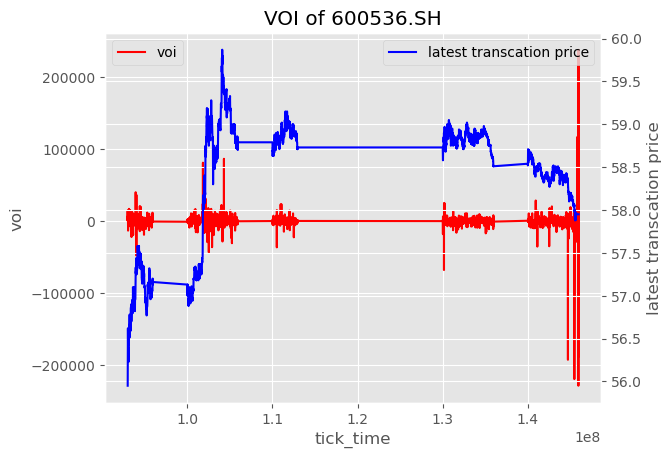

In [16]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
voi_stock = cal.voi(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'VOI of {test_stock}')
ax.plot(voi_stock,'r-', label = 'voi')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("voi")
ax2.set_ylabel("latest transcation price")


## 2. Test for Weighted VOI (Volume Order Imbalance)

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [17]:
cal.w_voi(tick_data)

stock_code  tick_time
000009.SZ   93000000              NaN
            93000000         0.000000
            93003000     22041.509091
            93006000      1745.454545
            93009000      -518.181818
                             ...     
688981.SH   145944000      -78.545455
            145950000     -196.363636
            145956000      -16.363636
            145959000      229.090909
            150000000    -8453.672727
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

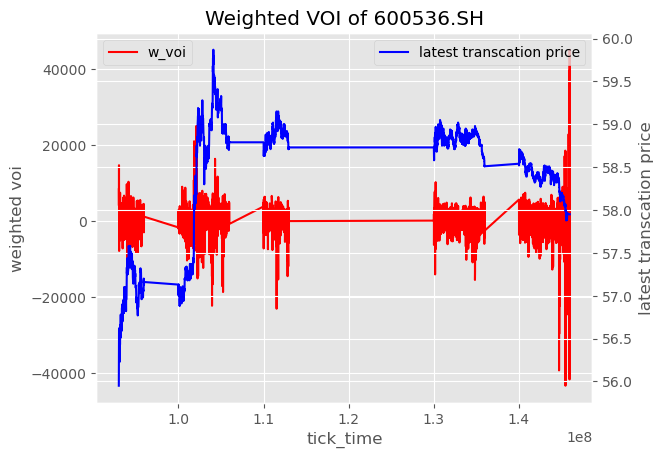

In [19]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
w_voi_stock = cal.w_voi(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'Weighted VOI of {test_stock}')
ax.plot(w_voi_stock,'r-', label = 'w_voi')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("weighted voi")
ax2.set_ylabel("latest transcation price")


## 3. Test for OFI 

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [20]:
cal.ofi(tick_data)

stock_code  tick_time
000009.SZ   93000000         NaN
            93000000         0.0
            93003000     11026.0
            93006000      5300.0
            93009000     -2500.0
                          ...   
688981.SH   145944000        0.0
            145950000        0.0
            145956000        0.0
            145959000        0.0
            150000000   -29979.0
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

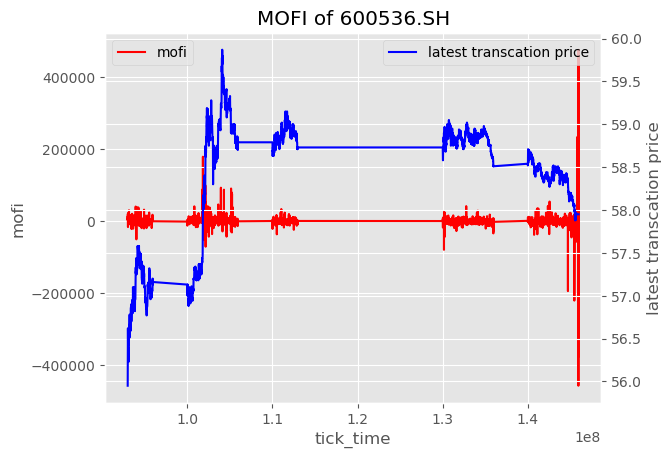

In [28]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
ofi_stock = cal.ofi(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'MOFI of {test_stock}')
ax.plot(mofi_stock,'r-', label = 'ofi')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("ofi")
ax2.set_ylabel("latest transcation price")


## 4. Test for MOFI 

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [22]:
cal.mofi(tick_data)

stock_code  tick_time
000009.SZ   93000000              NaN
            93000000         0.000000
            93003000     30997.872727
            93006000      1745.454545
            93009000      -518.181818
                             ...     
688981.SH   145944000      -78.545455
            145950000     -196.363636
            145956000      -16.363636
            145959000      229.090909
            150000000     1009.418182
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

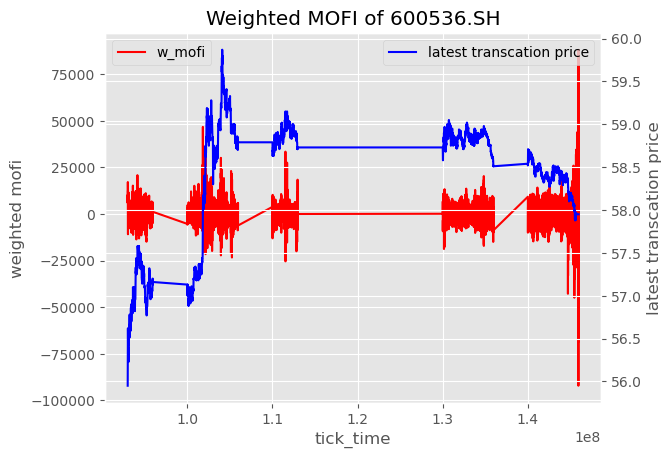

In [27]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
mofi_stock = cal.mofi(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'Weighted MOFI of {test_stock}')
ax.plot(w_mofi_stock,'r-', label = 'mofi')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("mofi")
ax2.set_ylabel("latest transcation price")


## 5. Test for OIR (Order Imbalance Ratio)

Input <br>
        - tick_data: tick_data that has been renamed <br>
Return <br>
        - multiple index series (<'pandas.core.series.Series'>) <br>

In [7]:
cal.oir(tick_data)

stock_code  tick_time
000009.SZ   93000000     0.188116
            93000000     0.188116
            93003000     0.422130
            93006000     0.430693
            93009000     0.411323
                           ...   
688981.SH   145944000    0.174409
            145950000    0.156455
            145956000    0.154916
            145959000    0.161089
            150000000    0.015114
Length: 2134623, dtype: float64

Text(0, 0.5, 'latest transcation price')

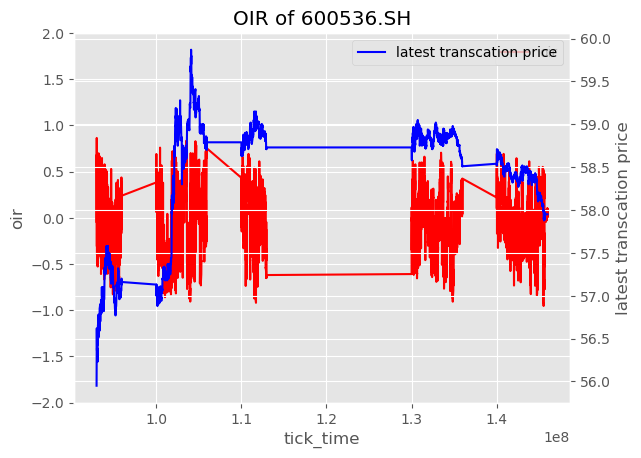

In [13]:
# test plot
test_stock = '600536.SH'
test_stock_org_data = tick_data.loc[tick_data['stock_code'] == test_stock]
oir_stock = cal.oir(tick_data)[test_stock]
fig, ax = plt.subplots()
plt.title(f'OIR of {test_stock}')
ax.plot(oir_stock,'r-', label = 'oir')
ax2 = ax.twinx()
ax2.plot(test_stock_org_data['tick_time'], test_stock_org_data['COLUMN07']/1e04, 'b-', label = 'latest transcation price')
ax.set_ylim(-2, 2)
ax.legend()
ax2.legend()
ax.set_xlabel("tick_time")
ax.set_ylabel("oir")
ax2.set_ylabel("latest transcation price")


In [22]:
        tick_data_ind = tick_data.loc[tick_data['stock_code'] == test_stock]
        """
        Step Order Imbalance Ratio (Individually)
        Calculate voi at a specific tick_time for all stock_code
        """
        w = [1 - (i - 1) / 10 for i in range(1, 11)]
        w = np.array(w) / sum(w)
        
        
        # w_b = sum([tick_data_ind[tick_b[i]]*w[i] for i in range(10)])
#         w_a = sum([tick_data_ind[tick_a[i]]*w[i] for i in range(10)])
#         data  = tick_data_ind
#         wb, wa = cal_weight_volume(tick_data_ind)

#         data.index = data['tick_time']

#         tick_fac_data = (wb-wa)/(wb+wa)


In [17]:
soir_v = lambda vb,va: (vb-va)/ (vb+va)

In [19]:
tick_b = ['buying_volume1',
              'buying_volume2',
              'buying_volume3',
              'buying_volume4',
              'buying_volume5',
              'buying_volume6',
              'buying_volume7',
              'buying_volume8',
              'buying_volume9',
              'buying_volume10']
    
tick_a = ['selling_volume1',
              'selling_volume2',
              'selling_volume3',
              'selling_volume4',
              'selling_volume5',
              'selling_volume6',
              'selling_volume7',
              'selling_volume8',
              'selling_volume9',
              'selling_volume10']


In [28]:
[soir_v(tick_data_ind[tick_b[i]],tick_data_ind[tick_a[i]]) for i in range(10)]

ValueError: operands could not be broadcast together with shapes (10,4817) (10,) 

In [27]:
[1,2,3]*np.array([1,2,3])

array([1, 4, 9])

In [29]:
w

array([0.18181818, 0.16363636, 0.14545455, 0.12727273, 0.10909091,
       0.09090909, 0.07272727, 0.05454545, 0.03636364, 0.01818182])

In [31]:
soir_v(tick_data_ind[tick_b[0]],tick_data_ind[tick_a[0]])

0         -0.728814
667        0.899160
1226       0.961538
1728      -0.882353
2228       0.971223
             ...   
2132852    0.000000
2133084    0.000000
2133500    0.000000
2133753    0.000000
2133998    0.000000
Length: 4817, dtype: float64